### IMPORT LIBRARY YANG DI PERLUKAN

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sb
sb.set()
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### MENGAMBIL DATASET 

In [5]:
df = pd.read_csv ('C:/Users/user/forexdata/usdidr1_data.csv')

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
df.drop(columns=['datetime'], inplace=True)
cols = ['date'] + [col for col in df if col != 'date']
df = df[cols]

In [7]:
df

,date,open,high,low,close,volume
0,2021-07-22,14545.9,14565.7,14517.5,14555.1,966.0
1,2021-07-23,14542.3,14555.9,14513.8,14526.4,863.0
2,2021-07-26,14541.1,14555.9,14399.4,14522.9,1418.0
3,2021-07-27,14515.8,14565.4,14509.8,14549.9,1283.0
4,2021-07-28,14533.6,14571.4,14478.9,14501.4,1463.0
...,...,...,...,...,...,...
726,2024-07-10,16292.0,16292.0,16208.5,16211.1,3466.0
727,2024-07-11,16216.7,16219.7,16053.3,16111.1,6139.0
728,2024-07-12,16137.1,16167.1,16075.1,16110.6,4754.0
729,2024-07-15,16147.6,16209.1,16146.9,16197.2,4405.0


### CEK MISSING VALUE PADA DATA

In [8]:
missing_values = df.isnull().sum()
print("Missing values per kolom:\n", missing_values)

Missing values per kolom:
 date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


### MELAKUKAN PRE-PROCESSING

In [9]:
df_selected = df[['date', 'open', 'close', 'volume']]

In [10]:
df_selected.loc[:, 'open'] = df_selected['open'].astype(int)
df_selected.loc[:, 'close'] = df_selected['close'].astype(int)
df_selected.loc[:, 'volume'] = df_selected['volume'].astype(int)

In [11]:
pd.options.display.float_format = '{:.0f}'.format

In [12]:
df_selected

,date,open,close,volume
0,2021-07-22,14545,14555,966
1,2021-07-23,14542,14526,863
2,2021-07-26,14541,14522,1418
3,2021-07-27,14515,14549,1283
4,2021-07-28,14533,14501,1463
...,...,...,...,...
726,2024-07-10,16292,16211,3466
727,2024-07-11,16216,16111,6139
728,2024-07-12,16137,16110,4754
729,2024-07-15,16147,16197,4405


### MEMPERHITUNG PERSAMAAN DATA PADA REGRESI LINIER

In [13]:
x_mean = df_selected['open'].mean()
y_mean = df_selected['close'].mean()

In [14]:
numerator = (df_selected['open'] * df_selected['close']).sum() - (len(df_selected) * x_mean * y_mean)
denominator = (df_selected['open'] ** 2).sum() - (len(df_selected) * x_mean ** 2)
b = numerator / denominator

In [15]:
a = y_mean - b * x_mean

In [16]:
print(f"Rata-rata open (x̅): {x_mean}")
print(f"Rata-rata close (y̅): {y_mean}")
print(f"Slope (b): {b}")
print(f"Intercept (a): {a}")
print(f"Persamaan regresi linear: y = {a:.4f} + {b:.4f}x")

Rata-rata open (x̅): 15099.351573187414
Rata-rata close (y̅): 15098.626538987688
Slope (b): 0.9944396115361076
Intercept (a): 83.23322610008108
Persamaan regresi linear: y = 83.2332 + 0.9944x


### MELAKUKAN PENGECEKAN PADA DATA YANG DI KLASIFIKASIKAN

In [17]:
features = df_selected[['open', 'close', 'volume']]

In [18]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(features)

In [20]:
df_selected.loc[:, 'cluster'] = kmeans.labels_

In [21]:
df_selected

,date,open,close,volume,cluster
0,2021-07-22,14545,14555,966,1
1,2021-07-23,14542,14526,863,1
2,2021-07-26,14541,14522,1418,1
3,2021-07-27,14515,14549,1283,1
4,2021-07-28,14533,14501,1463,1
...,...,...,...,...,...
726,2024-07-10,16292,16211,3466,1
727,2024-07-11,16216,16111,6139,0
728,2024-07-12,16137,16110,4754,0
729,2024-07-15,16147,16197,4405,1


### PLOT DATA CLUSTERING UNTUK MEMILIH DATA YANG PALING RELEVAN UNTUK DI LAKUKAN TAHAP ANALISIS LANJUT

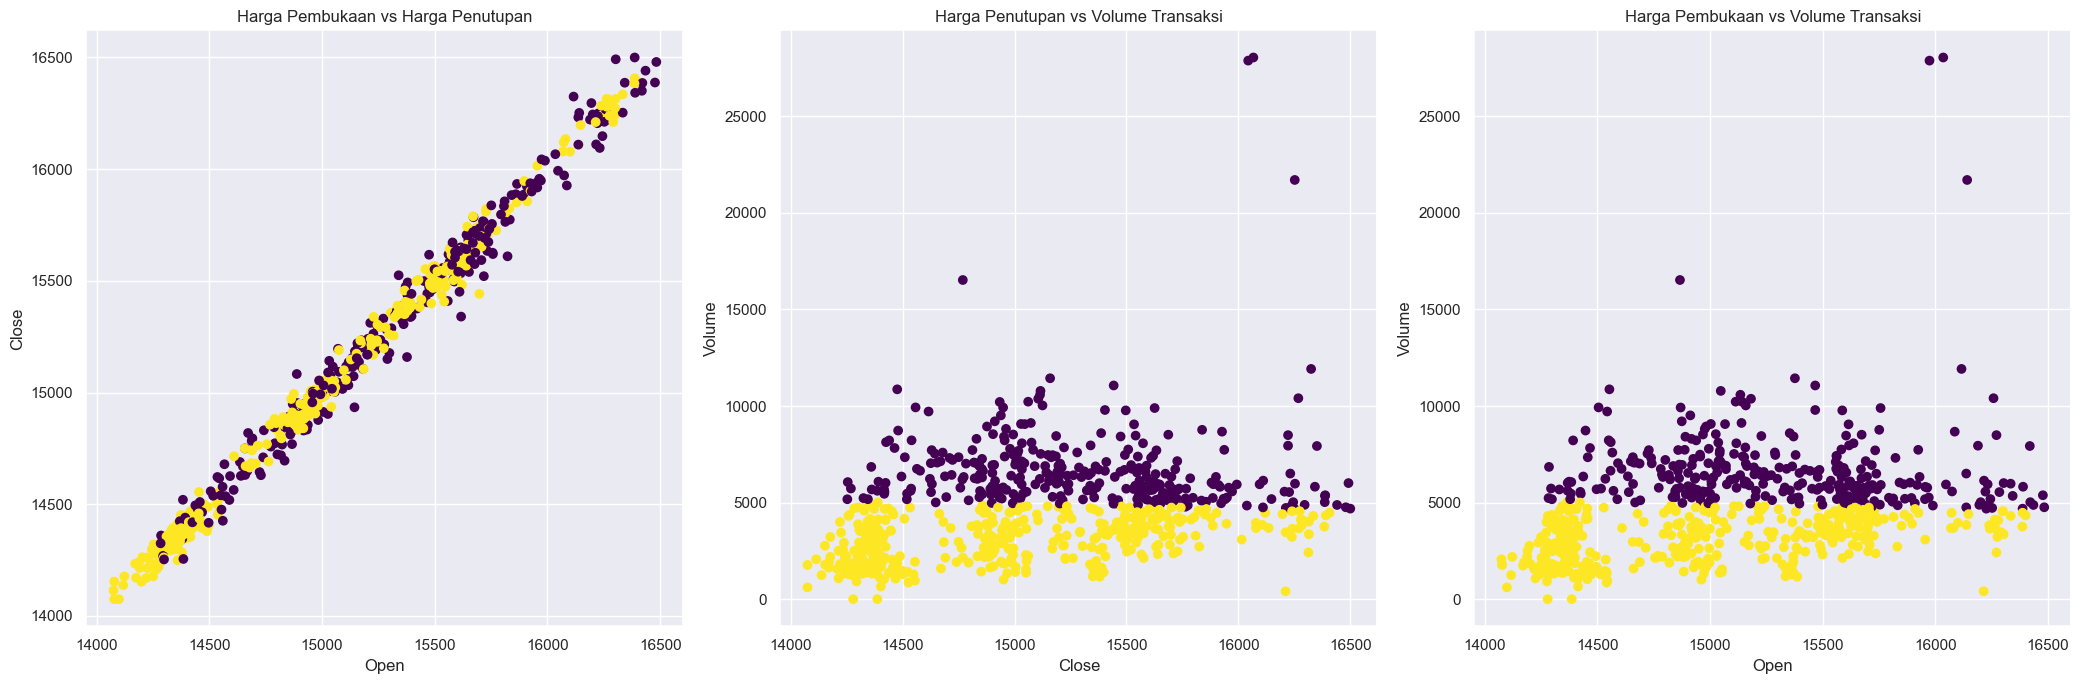

In [30]:
plt.figure(figsize=(21, 7))
plt.subplot(1, 3, 1)
plt.scatter(df_selected['open'], df_selected['close'], c=df_selected['cluster'], cmap='viridis')
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Harga Pembukaan vs Harga Penutupan')

plt.subplot(1, 3, 2)
plt.scatter(df_selected['close'], df_selected['volume'], c=df_selected['cluster'], cmap='viridis')
plt.xlabel('Close')
plt.ylabel('Volume')
plt.title('Harga Penutupan vs Volume Transaksi')

plt.subplot(1, 3, 3)
plt.scatter(df_selected['open'], df_selected['volume'], c=df_selected['cluster'], cmap='viridis')
plt.xlabel('Open')
plt.ylabel('Volume')
plt.title('Harga Pembukaan vs Volume Transaksi')

plt.tight_layout()
plt.show()

### MELAKUKAN PROSES REGRESI PADA DATA 

In [32]:
volume = np.random.randint(1000, 5000, size=len(df))
df['volume'] = volume
time = np.arange(1, len(df) + 1)
df['time'] = time
df = df[['time', 'close', 'volume']]
df = round(df, 2)

In [33]:
df

,time,close,volume
0,1,14555,1990
1,2,14526,2020
2,3,14523,3682
3,4,14550,1141
4,5,14501,1560
...,...,...,...
726,727,16211,2118
727,728,16111,3276
728,729,16111,3775
729,730,16197,3922


In [34]:
time = df['time'].values
close_price = df['close'].values

In [35]:
reg = np.polyfit(np.arange(len(time)), close_price, 1)
trend = np.polyval(reg, np.arange(len(time)))

In [36]:
std = close_price[-200:].std()

### MENAMPILKAN PLOT ACTUAL DATA REGRESI SERTA GARIS REGRESI DAN BATAS OUTLIER

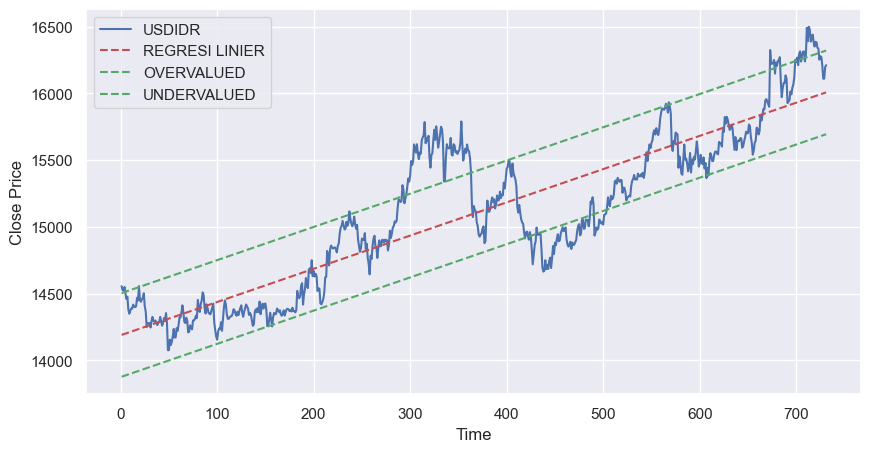

In [37]:
plt.figure(figsize=(10,5))
plt.plot(time, close_price, label="USDIDR")
plt.plot(time, trend, 'r--', label="REGRESI LINIER")
plt.plot(time, trend - std, 'g--', label="OVERVALUED")
plt.plot(time, trend + std, 'g--', label="UNDERVALUED")
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### MELIHAT VARIABEL-VARIABEL PENTING INDEPENDEN/DEPENDEN DARI DATA POINTS YANG DI SAJIKAN 

In [38]:
predict = np.poly1d(reg)
predict(732)

16013.101351458288

<Axes: xlabel='time', ylabel='close'>

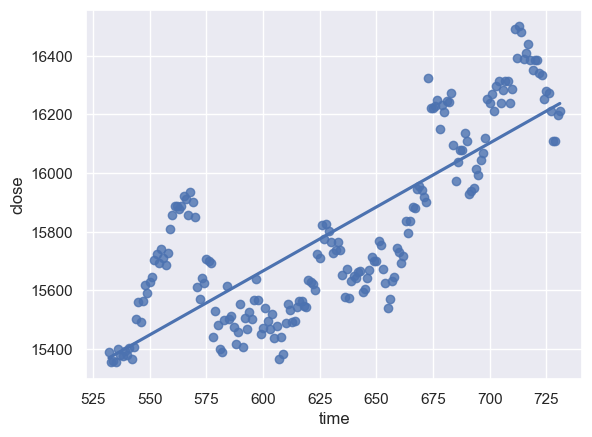

In [39]:
sb.regplot(x='time', y='close', ci=None, fit_reg=True, data=df[-200:])

### MELAKUKAN PENGECEKAN LEBIH MENDETAIL TERKAIT VOLUME POLA YANG TERSEMBUNYI

In [40]:
features = df[['close', 'volume']]

In [41]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(features)

In [42]:
df['cluster'] = kmeans.labels_

In [43]:
df

,time,close,volume,cluster
0,1,14555,1990,1
1,2,14526,2020,1
2,3,14523,3682,0
3,4,14550,1141,1
4,5,14501,1560,1
...,...,...,...,...
726,727,16211,2118,1
727,728,16111,3276,2
728,729,16111,3775,0
729,730,16197,3922,0


### SEBELUM MELAKUKAN PENGECEKAN LEBIH DETAIL PERLU DI PASTIKAN KEMBALI TIDAK ADA OUTLIER ATAU DATA ANOMALI

In [45]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

   
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df


df_cleaned = remove_outliers(df, 'close')
df_cleaned = remove_outliers(df_cleaned, 'volume')

### HASIL PENGECEKAN POLA VOLUME DATA MENGGUNAKAN KMEANS CLUSTERING 

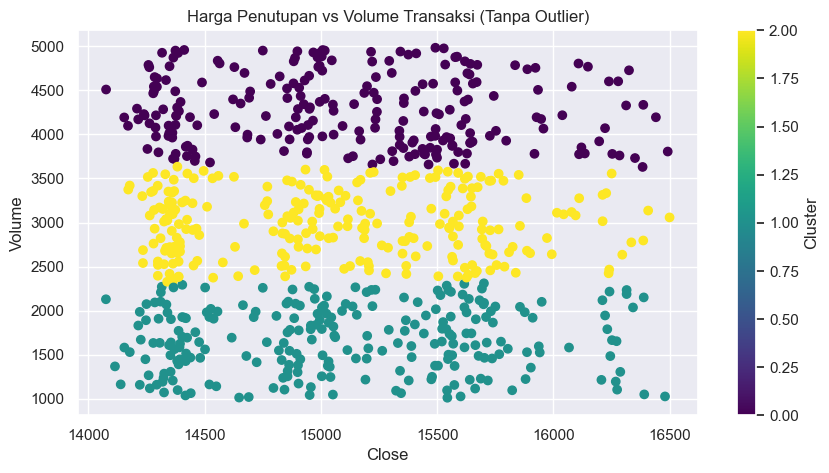

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(df_cleaned['close'], df_cleaned['volume'], c=df_cleaned['cluster'], cmap='viridis')
plt.xlabel('Close')
plt.ylabel('Volume')
plt.title('Harga Penutupan vs Volume Transaksi (Tanpa Outlier)')
plt.colorbar(label='Cluster')
plt.show()

### DARI POLA VOLUME DATA TINGGI YANG TERINDETIFIKASI OLEH KMEANS CLUSTERING MAKA DI LAKUKAN ANALISIS LEBIH LANJUT

In [47]:
def identify_high_volume_clusters(df, cluster_col, volume_col, threshold=0.75):
    cluster_avg_volume = df.groupby(cluster_col)[volume_col].mean()
    high_volume_clusters = cluster_avg_volume[cluster_avg_volume > cluster_avg_volume.quantile(threshold)].index
    return high_volume_clusters


def select_high_volume_data(df, high_volume_clusters, cluster_col):
    return df[df[cluster_col].isin(high_volume_clusters)]


def identify_reversal(df, close_col, window=20):
    df.loc[:, 'MA'] = df[close_col].rolling(window=window).mean()
    df.loc[:, 'Reversal'] = (df[close_col] < df['MA']).astype(int)
    return df

In [48]:
high_volume_clusters = identify_high_volume_clusters(df, 'cluster', 'volume')

df_high_volume = select_high_volume_data(df, high_volume_clusters, 'cluster').copy()

df_high_volume['MA'] = df_high_volume['close'].rolling(window=20).mean()
df_high_volume['Reversal'] = (df_high_volume['close'] < df_high_volume['MA']).astype(int)

### PLOT DATA YANG DI TAMPILKAN BERDASARKAN POLA DATA VOLUME YANG SUDAH DI KLASIFIKASIKAN UNTUK MENINGKATKAN AKURASI PREDIKSI PADA REGRESI

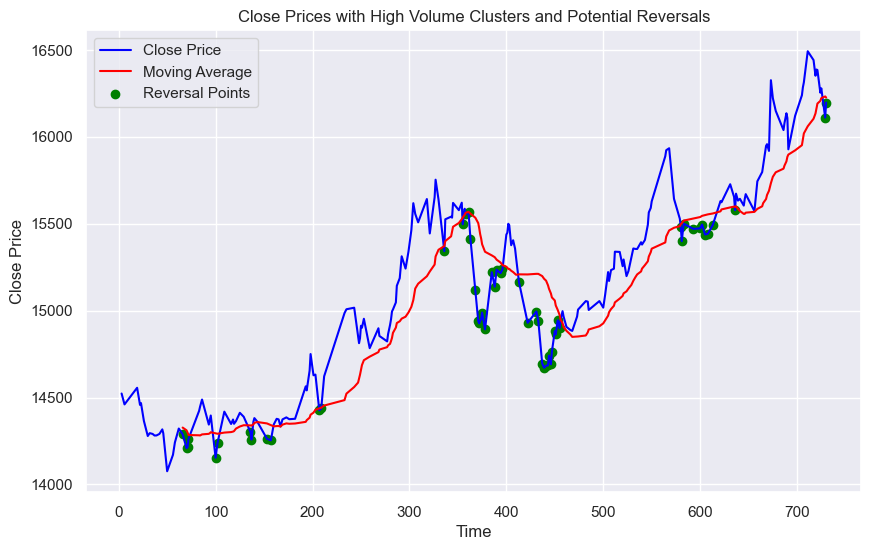

In [49]:
plt.figure(figsize=(10, 6))

plt.plot(df_high_volume['time'], df_high_volume['close'], label="Close Price", color='blue')

plt.plot(df_high_volume['time'], df_high_volume['MA'], label="Moving Average", color='red')

plt.scatter(df_high_volume[df_high_volume['Reversal'] == 1]['time'], 
            df_high_volume[df_high_volume['Reversal'] == 1]['close'], 
            color='green', marker='o', label="Reversal Points")

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Close Prices with High Volume Clusters and Potential Reversals')
plt.legend()
plt.grid(True)
plt.show()

### MEMASTIKAN TIDAK ADA DATA NAN ATAU MISSING VALUE

In [51]:
df = df.dropna()

### PROSES PELATIHAN HINGGA PENGUJIAN PADA DATA YANG DI LAKUKAN ANALISIS SEBELUMNYA DENGAN MENAMBAHKAN BEBERAPA FITUR UNTUK MENINGKATKAN AKURASI YANG LEBIH TAJAM

In [52]:
df['MA20'] = df['close'].rolling(window=20).mean()
df['MA50'] = df['close'].rolling(window=50).mean()
df['Volume_MA20'] = df['volume'].rolling(window=20).mean()
df['Close_Lag1'] = df['close'].shift(1)

df = df.dropna(subset=['MA20', 'MA50', 'Volume_MA20', 'Close_Lag1'])

features = ['volume', 'close', 'MA20', 'MA50', 'Volume_MA20', 'Close_Lag1']  
df['Future_Close'] = df['close'].shift(-1) 

df = df.dropna(subset=['Future_Close'] + features)

X = df[features]
y = df['Future_Close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

pred_df = pd.DataFrame({'Prediction': lin_model.predict(X_scaled)}, index=df.index)

Mean Squared Error (MSE): 3427.0083537893534
Root Mean Squared Error (RMSE): 58.54065556337197


### MENAMPILKAN PLOT DATA YANG SUDAH DI LATIH DAN DI UJI DI IMPLEMENTASIKAN KE PASAR UNTUK DI LAKUKAN PREDIKSI

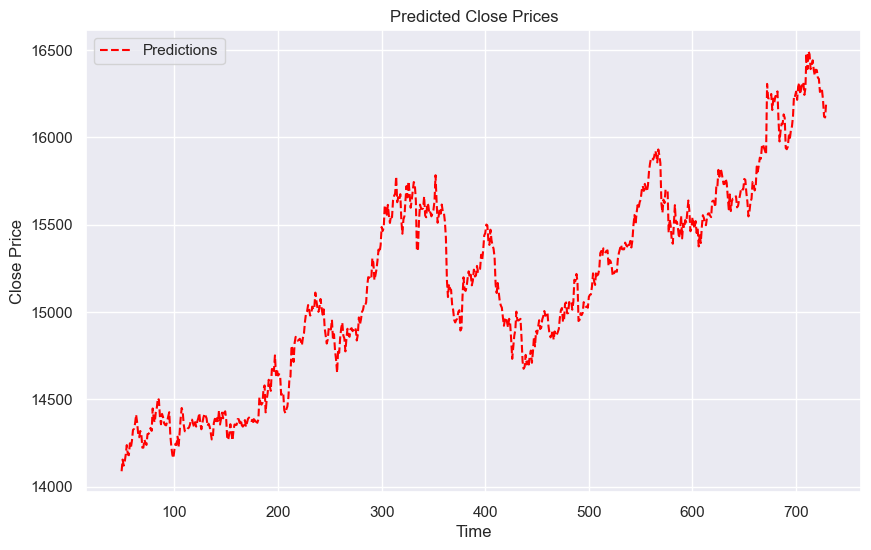

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df.index, pred_df['Prediction'], label='Predictions', color='red', linestyle='--')
plt.title('Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### MELAMPIRKAN DATA ACTUAL SERTA PREDIKSI YANG DI SAJIKAN BERDASARKAN REGRESI LINIER DARI HASIL KLASIFIKASI CLUSTERING

In [60]:
next_features = X.iloc[-1].values.reshape(1, -1)
next_features_scaled = scaler.transform(next_features)
predicted_close = lin_model.predict(next_features_scaled)
print(f'Predicted Next Close Price: {predicted_close[0]}')

combined_df = pd.DataFrame({
    'Time': df.index,
    'Actual Close': df['close'],
    'Predicted Close': lin_model.predict(X_scaled)
})

next_time = df.index[-1] + 1  
next_pred_df = pd.DataFrame({'Time': [next_time], 'Actual Close': [None], 'Predicted Close': [predicted_close[0]]})
combined_df = pd.concat([combined_df, next_pred_df], ignore_index=True)

print("Combined Predictions:")
print(combined_df[['Time', 'Actual Close', 'Predicted Close']])

Predicted Next Close Price: 16195.723178837814
Combined Predictions:
     Time  Actual Close  Predicted Close
0      49         14076            14088
1      50         14154            14155
2      51         14114            14120
3      52         14139            14141
4      53         14178            14184
..    ...           ...              ...
677   726         16211            16213
678   727         16111            16118
679   728         16111            16114
680   729         16197            16196
681   730           NaN            16196

[682 rows x 3 columns]


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_10152\3624118057.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([combined_df, next_pred_df], ignore_index=True)
